# План лекции

### 1. скачивание датасета
### 2. Пример приведения DCM to PNG или JPG
### 3 Пример текстовой разметки
### 4. Разметка изображений
#### 4.1 YOLO studio
#### 4.2 CVAT
#### 4.3 3D slicer
### 5 PACS системы на примере Orthanc
### 6 Пример работы с данными на примере клин испытаний



# 1. Скачивание датасета

In [ ]:
Где искать:
1. Kaggle
2. https://paperswithcode.com/ - имеются решения, можно посмотреть статистику лучших решений сразу со статьями и кодом

In [ ]:
Датасет с 1 занятия https://www.kaggle.com/datasets/trainingdatapro/chest-xray-17-diseases?resource=download

# 2. Пример приведения DCM to PNG или JPG

In [ ]:
https://ru.wikipedia.org/wiki/DICOM
https://habr.com/ru/articles/217761/    

https://pycad.co/how-to-convert-a-dicom-image-into-jpg-or-png/

# Импортируем библиотеки

In [4]:
# pip install pydicom

In [1]:
import pydicom
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

# Работаем с рентгеном

# Считываем файл

In [2]:
# путь до файла
dcm_path = r'C:\Users\ruzks\Med_AI\Med_AI\data\rg\rg_abscess\0.dcm'

In [3]:
# считываем dicom
dcm_data = pydicom.dcmread(dcm_path) 

In [4]:
dcm_data

C:\Users\andrey\anaconda3\lib\site-packages\pydicom\valuerep.py:443: UserWarning: The value length (32) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 166
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 76778116378200719135630101953900
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.2198
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: ''
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 76778116378200719135630101953900
(0008, 0020) Stu

# Откроем снимок с помощью matplotlib

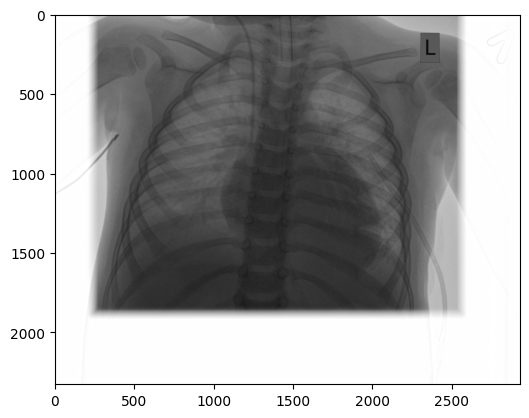

In [12]:
plt.imshow(dcm_data.pixel_array, cmap=plt.cm.gray)
plt.savefig('trash/foo0.png')

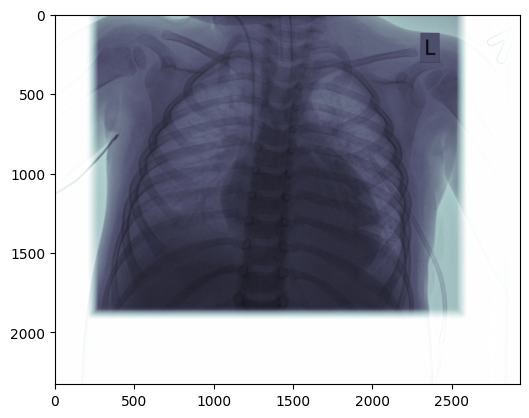

In [5]:
plt.imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
plt.savefig('trash/foo.png')

# Откроем с помощь Pillow

In [6]:
new_image = dcm_data.pixel_array.astype(float)

In [7]:
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0

In [8]:
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray(scaled_image)

In [9]:
final_image.show()

In [10]:
final_image.save('trash/image.jpg')

In [11]:
final_image.save('trash/image.png')

In [36]:
# pip install opencv-python

# Поработаем с КТ

### Нужно запустить через консоль

python <путь до скрипта> --input <путь до папки с исследованием> --output <путь до папки, куда сохранять> --window_centre 40 
--window_length 400


# 3. Пример текстовой разметки

In [ ]:
# https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification

In [15]:
import pandas as pd

In [9]:
df = pd.read_csv(r'test_data/alldata_1_for_kaggle.csv', encoding='ANSI')

In [10]:
df

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis п¬Ѓb...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


# 4.1 YOLO label

### удобный инструмент для разметки изображений для задач детекции

### YOLO для задачи детекции, размечаем bounding box|

In [ ]:
https://github.com/developer0hye/Yolo_Label

# 4.2 CVAT

https://habr.com/ru/articles/677484/

In [ ]:
Размечаем - скачиваем - достаем данные из джейсона, рисуем на изображении

In [15]:
import json

data_path = r'C:\workhard\telemed\mirea_lection\project_points_annotations_2024_11_04_20_11_50_datumaro 1.0\annotations\Train.json'

# Open and read the JSON file
with open(data_path, 'r') as file:
    data = json.load(file)

In [16]:
# Print the data
print(data)

{'info': {}, 'categories': {'label': {'labels': [{'name': 'label_first', 'parent': '', 'attributes': []}], 'attributes': ['occluded']}, 'points': {'items': []}}, 'items': [{'id': '1', 'annotations': [{'id': 0, 'type': 'points', 'attributes': {'occluded': False}, 'group': 0, 'label_id': 0, 'points': [1833.51, 917.71, 1891.38, 1091.32, 1505.58, 1457.84], 'z_order': 0, 'visibility': [2, 2, 2]}, {'id': 0, 'type': 'polyline', 'attributes': {'occluded': False}, 'group': 0, 'label_id': 0, 'points': [873.18, 983.07, 983.07, 1532.55, 1324.97, 1495.92, 1556.97, 1300.55, 1654.65, 897.6, 1355.5, 781.6, 1092.97, 1007.5, 873.18, 995.28], 'z_order': 0}], 'attr': {'frame': 0}, 'point_cloud': {'path': ''}}]}


In [26]:
data['items']

[{'id': '1',
  'annotations': [{'id': 0,
    'type': 'points',
    'attributes': {'occluded': False},
    'group': 0,
    'label_id': 0,
    'points': [1833.51, 917.71, 1891.38, 1091.32, 1505.58, 1457.84],
    'z_order': 0,
    'visibility': [2, 2, 2]},
   {'id': 0,
    'type': 'polyline',
    'attributes': {'occluded': False},
    'group': 0,
    'label_id': 0,
    'points': [873.18,
     983.07,
     983.07,
     1532.55,
     1324.97,
     1495.92,
     1556.97,
     1300.55,
     1654.65,
     897.6,
     1355.5,
     781.6,
     1092.97,
     1007.5,
     873.18,
     995.28],
    'z_order': 0}],
  'attr': {'frame': 0},
  'point_cloud': {'path': ''}}]

In [29]:
data['categories']['points']

{'items': []}

# 4.3 3D slicer

# 5 PACS системы на примере Orthanc

### скачать

https://orthanc.uclouvain.be/downloads/windows-64/installers/index.html

In [ ]:
# В браузере ввести:
    
http://localhost:8042/
http://localhost:8042/patients/ - список и смотрим на каждогго
studies
series
instances

In [ ]:
# настройки сервера

orthanc.json
поменять порт

In [ ]:
 {
    "Name": "OrthancServer",
    "StorageDirectory": "/var/lib/orthanc/db",
    "HttpServerEnabled": true,
    "HttpPort": 8042,
    "DicomAet": "ORTHANC",
    "DicomPort":4242
}

In [31]:
# https://pyorthanc.readthedocs.io/en/latest/readme.html#example-of-usage

# pyorthanc

In [6]:
pip install pyorthanc

Note: you may need to restart the kernel to use updated packages.  Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
  Using cached httpcore-1.0.6-py3-none-any.whl (78 kB)



In [13]:
import pyorthanc

In [14]:
client = pyorthanc.Orthanc('http://localhost:8042')#, username='orthanc', password='orthanc')
patient_ids = client.get_patients()

In [15]:
patient_ids 

['36973d83-94641d7b-4caf42a4-c6edd8e2-a0cc7f5f',
 '3b10d8de-0c6b7f73-16281d52-4714a315-9c80cc10',
 '4d283bb5-6945c228-8c36b00a-0c4a507f-42408cd2',
 'eb3f5b7a-66837170-8e92db87-49bdd263-98f750b3']

In [ ]:
# https://orthanc.uclouvain.be/book/integrations/modality.html
    
# создание модальности и проверка связи

modality = pyorthanc.Modality(client, 'another_modality')
assert modality.echo()

# orthanc_rest_client

In [10]:
pip install orthanc-rest-client

In [16]:
from orthanc_rest_client import Orthanc

In [17]:
# Справка по библиотеке
help(Orthanc)

Help on class Orthanc in module orthanc_rest_client.orthanc:

class Orthanc(builtins.object)
 |  Orthanc(server, auth=None, warn_insecure=True)
 |  
 |  A class for interfacing with Orthanc DICOM REST APIs.
 |  
 |  :param str server:
 |      Fully qualified URL of the API
 |  :param requests.auth.HTTPBasicAuth auth:
 |      Auth object from :mod:`requests` with server credentials (optional)
 |  :param bool warn_insecure:
 |      Warn on HTTP endpoints (default: True)
 |  :return:
 |      A class with robust methods to interact with the REST API
 |  :rtype:
 |      class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, server, auth=None, warn_insecure=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_instance(self, dicom, **kwargs)
 |      Add DICOM instance.
 |      
 |      :param data dicom:
 |          The DICOM data
 |      :return:
 |  
 |  anonymize_instance(self, id_, data={}, **kwa

In [18]:
orthanc = Orthanc('http://localhost:8042')

C:\Users\ruzks\Med_AI\Med_AI\med_venv\lib\site-packages\orthanc_rest_client\orthanc.py:58: UserWarning: http://localhost:8042 is an unencrypted connection! Strongly consider using an encrypted (https) REST endpoint.
  warn(


In [19]:
# Получаем исследование

In [20]:
st = orthanc.get_patients()

In [21]:
st

['36973d83-94641d7b-4caf42a4-c6edd8e2-a0cc7f5f',
 '3b10d8de-0c6b7f73-16281d52-4714a315-9c80cc10',
 '4d283bb5-6945c228-8c36b00a-0c4a507f-42408cd2',
 'eb3f5b7a-66837170-8e92db87-49bdd263-98f750b3']

# CURL

In [22]:
# список пациентов
!curl http://127.0.0.1:8042/patients

[
   "36973d83-94641d7b-4caf42a4-c6edd8e2-a0cc7f5f",
   "3b10d8de-0c6b7f73-16281d52-4714a315-9c80cc10",
   "4d283bb5-6945c228-8c36b00a-0c4a507f-42408cd2",
   "eb3f5b7a-66837170-8e92db87-49bdd263-98f750b3"
]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   206  100   206    0     0  63895      0 --:--:-- --:--:-- --:--:--  100k


# Пример работы с requests

In [23]:
import requests

In [24]:
r = requests.get('http://127.0.0.1:8042/patients')
r.json()

['36973d83-94641d7b-4caf42a4-c6edd8e2-a0cc7f5f',
 '3b10d8de-0c6b7f73-16281d52-4714a315-9c80cc10',
 '4d283bb5-6945c228-8c36b00a-0c4a507f-42408cd2',
 'eb3f5b7a-66837170-8e92db87-49bdd263-98f750b3']

# Отправка исследований на другую модальность

In [ ]:
for num, study in enumerate(studies):
    data = json.dumps({"Resources":[study],
     "Synchronous":False})
    res = requests.post('http://172.16.43.19:8042/modalities/another_modality/store', data = data)
    print(num)
    print(study)
    print(res)
    time.sleep(180)

# Скачивание при помощи wget

In [25]:
# pip install wget

In [26]:
import wget

In [30]:
wget.download('http://localhost:8042/instances/77da4217-59a717ff-66199c9e-e82d965e-eabeca76/file', 
              r'C:\Users\ruzks\Med_AI\Med_AI\trash\1.dcm')

 52% [.....................................                                   ]  5562368 / 10661072

100% [........................................................................] 10661072 / 10661072

'C:\\Users\\ruzks\\Med_AI\\Med_AI\\trash\\1.dcm'

# Скачивание всех исследований для определенного пациента

In [31]:

def download_dcm(patient):
    '''Данная функция на вход получает ID пациента
    Создает папку с его именем в текущей директории(где хранится скрипт)
    И записывает туда все его дайкомы'''
    
    patient_url = 'http://127.0.0.1:8042/patients/' + patient # ссылка до пациента
    request_json = requests.get(patient_url) # делаем реквест к пациенты
    studies = request_json.json()['Studies'] #возвращаем list с исследованиями пациента
    #print(studies) #test print
    
    # итерируемся по исследованиям
    for study in studies: 
        study_url = 'http://127.0.0.1:8042/studies/' + study # ссылка до исследований
        request_json = requests.get(study_url) # реквест до исследования
        series = request_json.json()['Series'] # возвращаем список серий для исследования
        #print(series) #test print
        
        # получаем id исследования
        study_id = request_json.json()['MainDicomTags']["StudyInstanceUID"]
        
        # итерируемся по списку серий
        for serie in series: 
            serie_url = 'http://127.0.0.1:8042/series/' + serie # ссылка до серии
            serie_json = requests.get(serie_url) # реквест до серии
            instances = serie_json.json()['Instances'] # (return list of instances) - список экземпляров снимков для серии
            #print(instances) #test print
            
            # итерируемся по экземплярам снимков
            for instance in instances: 
                instance_url = 'http://127.0.0.1:8042/instances/' + instance + '/file' # ссылка до экземпляра снимка
                
                # создание папки в  директории для исследования
                if not os.path.exists(r'C:\Users\ruzks\Med_AI\Med_AI\data\output\\'+  study_id):  # если папки не существует, то создаем
                    os.mkdir(r'C:\Users\ruzks\Med_AI\Med_AI\data\output\\' +   study_id)
                    
                output_file_dir = r'C:\Users\ruzks\Med_AI\Med_AI\data\output\\'  +  study_id + '\\' + instance + '.dcm' # куда пишем файл
                wget.download(instance_url, output_file_dir) # скачиваем экземпляр снимка

In [32]:
download_dcm("eb3f5b7a-66837170-8e92db87-49bdd263-98f750b3")

 58% [.........................................                               ]  7921664 / 13633890

  0% [                                                                        ]    73728 / 13633886

 53% [......................................                                  ]  7290880 / 13633886

100% [........................................................................] 13633886 / 13633886

# Литература по теме

https://habr.com/ru/articles/217761/